In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from time import time
from timeit import timeit

In [2]:
from xlines import utils, KLines, XLines

In [3]:
def rotated_cov(a, l1, l2, radians = False):
    r = utils.rotation_matrix(a, radians)
    d = np.diag([l1, l2])
    return np.dot(r, np.dot(d, r.T))

## Example with 4 lines

C:\MyPrograms\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


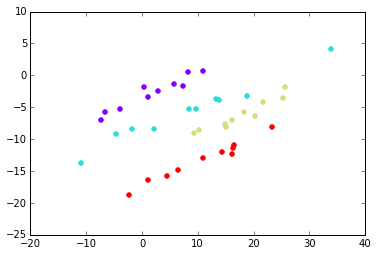

In [4]:
# Number of samples per component
n_samples = 10

# Generate random sample, 4 components
np.random.seed(0)
COV = rotated_cov(20, 100., 0.5)  # covariance matrix
origins = [[10., 0.], [10., -5.], [10., -9.], [8., -14.]]
# origins = [[10., 0.], [10., -5.], [8., -20.]]

# Data
Xs = [np.random.multivariate_normal(O, COV, size=n_samples) for O in origins]
X = np.concatenate(Xs, axis=0)

colors = mpl.cm.rainbow(np.linspace(0, 1, len(Xs)))
for x,c in zip(Xs,colors):
    plt.scatter(x[:, 0], x[:, 1], color=c)
plt.show()

## KLines with k=4

In [5]:
model = KLines(n_components=4, init_alpha=True, max_iter=15, verbose=1)
model.fit(X)
a = model.alpha_ # orientation in radians

print("\nConverged with orientation: {:.2f}".format(utils.rad2deg(a)))
print("Line centroids:\n{}".format(model.centroids_))

Selected alpha=40.0 at init
Kmeans w/ proj 40.00: -91.99
Kmeans w/ proj 34.51: -64.73
Kmeans w/ proj 29.91: -57.83
Kmeans w/ proj 26.06: -36.82
Kmeans w/ proj 22.56: -19.34
Kmeans w/ proj 21.10: -15.93

Converged with orientation: 21.10
Line centroids:
[[  5.86781727 -15.20455437]
 [  1.16602816  -3.0213856 ]
 [  4.36984832 -11.32305135]
 [  2.98301772  -7.72952753]]


## XLines with candidates: [4,2,3,5,6]

In [6]:
tol = 0.01
clustering_n_init = 3
clustering_init = "estimate"

xmodel = XLines(candidates=[4,2,3,5,6], init_alpha="one", metric="silhouette", tol=tol, clustering_n_init=clustering_n_init, clustering_init=clustering_init, verbose=2)
best_model, best_k = xmodel.fit(X)

-Test 4 components
Selected alpha=40.0 at init
Kmeans w/ proj 40.00: -91.99
Kmeans w/ proj 34.51: -64.73
Kmeans w/ proj 29.91: -57.83
Kmeans w/ proj 26.06: -36.82
Kmeans w/ proj 22.56: -19.34
Kmeans w/ proj 21.10: -15.93
-Test 2 components
Kmeans w/ proj 21.10: -229.82
Kmeans w/ proj 23.06: -226.11
Kmeans w/ proj 24.18: -225.72
Kmeans w/ proj 26.05: -216.64
-Test 3 components
Kmeans w/ proj 21.10: -92.24
Kmeans w/ proj 22.05: -94.05
Kmeans w/ proj 22.98: -96.11
-Test 5 components
Kmeans w/ proj 21.10: -12.29
Kmeans w/ proj 18.86: -11.92
Kmeans w/ proj 19.81: -11.58
-Test 6 components
Kmeans w/ proj 21.10: -9.26
-Results:
Candidate scores: [0.80366761617576254, 0.66726385123590215, 0.62515825909242806, 0.73288783035788452, 0.72186833098641578]
Best model with 4 components
Best model with orientation: 21.10


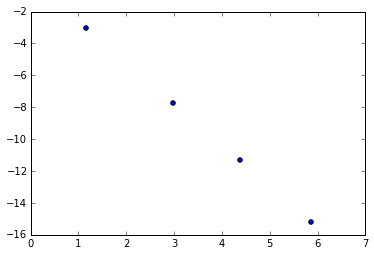

In [7]:
for x,y in best_model.centroids_:
    plt.scatter(x,y)
plt.show()